In [1]:
!pip3 install https://download.pytorch.org/whl/cu90/torch-1.1.0-cp36-cp36m-win_amd64.whl

ERROR: torch-1.1.0-cp36-cp36m-win_amd64.whl is not a supported wheel on this platform.


In [0]:
import torch
import numpy as np
import torch.nn.functional as F
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn

#### 실제로 GPU 사용할 수 있는지 확인

In [3]:
torch.cuda.is_available()

True

In [0]:
a = torch.FloatTensor([[2,3,4,5]])

In [5]:
a

tensor([[2., 3., 4., 5.]])

In [0]:
b = np.array([[3,4,5,6]])

In [9]:
b.reshape(2,2)

array([[3, 4],
       [5, 6]])

In [11]:
a.view(2,-1)

tensor([[2., 3.],
        [4., 5.]])

In [12]:
a.view(2,-1).flatten()

tensor([2., 3., 4., 5.])

#### unsqueeze, squezze는 shape을 맞춰줄때

In [13]:
a.unsqueeze(1).shape

torch.Size([1, 1, 4])

In [14]:
a.unsqueeze(1).squeeze(0).shape

torch.Size([1, 4])

#### GPU에 들어가게 하려면 torch.cuda.으로 사용해야함.
#### 선택할때는 torch.device('cuda') or torch.device('cpu')

In [17]:
device = torch.device('cuda:0') # 첫번째있는 GPU

a = a.to(device)
a

tensor([[2., 3., 4., 5.]], device='cuda:0')

In [18]:
!nvidia-smi # 실제로 GPU 사용하고 있는지 확인

Mon Jul 29 05:31:16 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    29W /  70W |    771MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
a = torch.cuda.FloatTensor(1024,1024,256)

#### torch.nn : 각종 뉴럴 네트워크 관련 클래스들 제공

In [0]:
linear = torch.nn.Linear(4,1)

In [0]:
x = torch.FloatTensor([0,-10,-1,-1])

In [38]:
linear.weight

Parameter containing:
tensor([[-0.1131, -0.0043, -0.2610,  0.1055]], requires_grad=True)

In [39]:
F.sigmoid(linear(x))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([0.4549], grad_fn=<SigmoidBackward>)

In [40]:
F.tanh(linear(x))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


tensor([-0.1790], grad_fn=<TanhBackward>)

#### dim : 행을 1? 열을 1? 정하는 것

In [41]:
F.softmax(linear(x), dim = 0)

tensor([1.], grad_fn=<SoftmaxBackward>)

In [0]:
linear1 = torch.nn.Linear(784,15)
linear2 = torch.nn.Linear()

### 사이킷런 캘리포니아 집값 예측 실습

In [0]:
data = fetch_california_housing()

In [56]:
data.data.shape

(20640, 8)

In [57]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [58]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

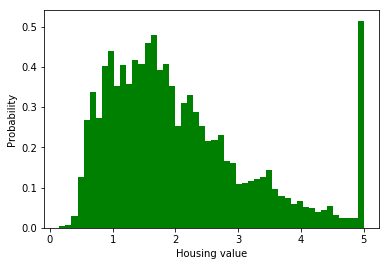

In [62]:
plt.hist(data.target, 50, density=True,facecolor="g")
plt.xlabel("Housing value")
plt.ylabel("Probability")
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.2)

In [126]:
X_train.shape

(16512, 8)

### min-max 정규화

In [0]:
min_, max_ = y_train.min(), y_train.max()
y_train = (y_train-min_) / (max_ - min_)

### 각각 feature별로 정규화 / 표준 정규화

#### 대부분 sklearn class는 fit하고 transform하는 형태

####  data.target은 정규 분포가 쏠려있음.

In [0]:
std_scaler = StandardScaler()

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [129]:
std_scaler.mean_

array([ 3.87105268e+00,  2.86307534e+01,  5.42926710e+00,  1.09599873e+00,
        1.42734163e+03,  3.07351263e+00,  3.56341982e+01, -1.19571880e+02])

In [130]:
std_scaler.var_

array([3.55979204e+00, 1.59601968e+02, 6.35354056e+00, 2.29298345e-01,
       1.26227319e+06, 1.19547814e+02, 4.56342848e+00, 4.02267155e+00])

In [0]:
X_train, y_train = torch.from_numpy(X_train) ,torch.from_numpy(y_train)
X_test, y_test = torch.from_numpy(X_test) ,torch.from_numpy(y_test)

X_train, y_train = X_train.float(), y_train.float()
X_test, y_test = X_test.float(), y_test.float()

y_train, y_test = y_train.view(-1,1), y_test.view(-1,1)

In [132]:
X_train

tensor([[-0.7162,  0.5042, -0.7778,  ...,  0.0197, -0.6714,  0.5643],
        [-1.1471,  1.6123, -0.4461,  ..., -0.0299, -0.7744,  0.6242],
        [-0.0998,  1.2166, -0.4276,  ...,  0.0597,  0.9717, -1.4200],
        ...,
        [-0.1903, -0.8415, -0.1379,  ..., -0.0303,  0.5036, -1.0960],
        [ 0.4846, -1.7122, -0.4151,  ..., -0.0885, -0.7182,  0.6940],
        [ 1.0530, -0.6040,  1.2786,  ...,  0.0353, -0.6339,  0.4048]])

In [0]:
train_dataset = TensorDataset(X_train,y_train)
test_dataset = TensorDataset(X_test,y_test)

In [134]:
train_dataset.tensors

(tensor([[-0.7162,  0.5042, -0.7778,  ...,  0.0197, -0.6714,  0.5643],
         [-1.1471,  1.6123, -0.4461,  ..., -0.0299, -0.7744,  0.6242],
         [-0.0998,  1.2166, -0.4276,  ...,  0.0597,  0.9717, -1.4200],
         ...,
         [-0.1903, -0.8415, -0.1379,  ..., -0.0303,  0.5036, -1.0960],
         [ 0.4846, -1.7122, -0.4151,  ..., -0.0885, -0.7182,  0.6940],
         [ 1.0530, -0.6040,  1.2786,  ...,  0.0353, -0.6339,  0.4048]]),
 tensor([[0.4342],
         [0.2136],
         [0.4130],
         ...,
         [0.3295],
         [0.2847],
         [0.5181]]))

In [0]:
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size = 32)

In [0]:
class Model(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Model, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.linear1 = nn.Linear(self.input_dim, self.hidden_dim)
        self.linear2 = nn.Linear(self.hidden_dim, 1)
        
    def forward(self, x):
        z1 = self.linear1(x)
        a1 = torch.relu(z1)
        z2 = self.linear2(a1)
        a2 = torch.sigmoid(z2)
        return a2

In [0]:
device = torch.device('cuda')
model = Model(8,32)
model = model.to(device)

mse_loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [138]:
epochs = 10

model.train()

for e in range(epochs):
    for i, (batch_X, batch_y) in enumerate(train_loader):
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        predict = model(batch_X)
        loss = mse_loss(predict, batch_y)
        
        optimizer.zero_grad() # 초기화 해줌.
        loss.backward() # 각 가중치별로 그래디언트 계산
        optimizer.step() # 한번 모델이 업데이트
        
        if i % 200 == 0:
            loss = loss.cpu() # loss.item()은 값 하나 일 때 
            print(f"{e},{i} - {loss}") # loss는 GPU에 있기 때문에 에러남.

0,0 - 0.08881314098834991
0,200 - 0.026668798178434372
0,400 - 0.013472087681293488
1,0 - 0.01951008476316929
1,200 - 0.01860024221241474
1,400 - 0.031463656574487686
2,0 - 0.011640671640634537
2,200 - 0.019498061388731003
2,400 - 0.010509505867958069
3,0 - 0.018829554319381714
3,200 - 0.014494603499770164
3,400 - 0.009804876521229744
4,0 - 0.019375480711460114
4,200 - 0.007325437851250172
4,400 - 0.012665113434195518
5,0 - 0.025313574820756912
5,200 - 0.011210042051970959
5,400 - 0.014017784968018532
6,0 - 0.028498772531747818
6,200 - 0.006761033087968826
6,400 - 0.009099423885345459
7,0 - 0.017039040103554726
7,200 - 0.01417502947151661
7,400 - 0.024206895381212234
8,0 - 0.016794478520751
8,200 - 0.008802050724625587
8,400 - 0.017997868359088898
9,0 - 0.00609503872692585
9,200 - 0.010230837389826775
9,400 - 0.013285118155181408


In [148]:
l1_loss = nn.L1Loss()
test_num = 0
total_loss = []

with torch.no_grad(): # 이 스코프에서 어떤 연산을 하더라도 gradient가 연산을 안함
    model.eval()
    
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        predict = model(batch_X)
        
        predict = (max_ - min_)*predict + min_
        loss = l1_loss(predict, batch_y)
        
        loss = loss.item()
        batch_size = batch_X.size(0)
        total_loss.append(loss*batch_size)
        test_num += batch_size
        
total_loss = np.sum(total_loss)/test_num
print(total_loss)
        

0.41275334785612977
